# Echo Cancellation - Lecture 2
- Primary signal, d(n) (signal.asc) is a combination of a local signal and interference (echo)
- Local signal, unknown (local.asc) this is the pure signal without the noise
- Remote signal, echo noise (remota.asc) this is the interference
- Sampling rate 8kHz
We want to make a NLMS adaptive filter

### Make the block diagram for the filter
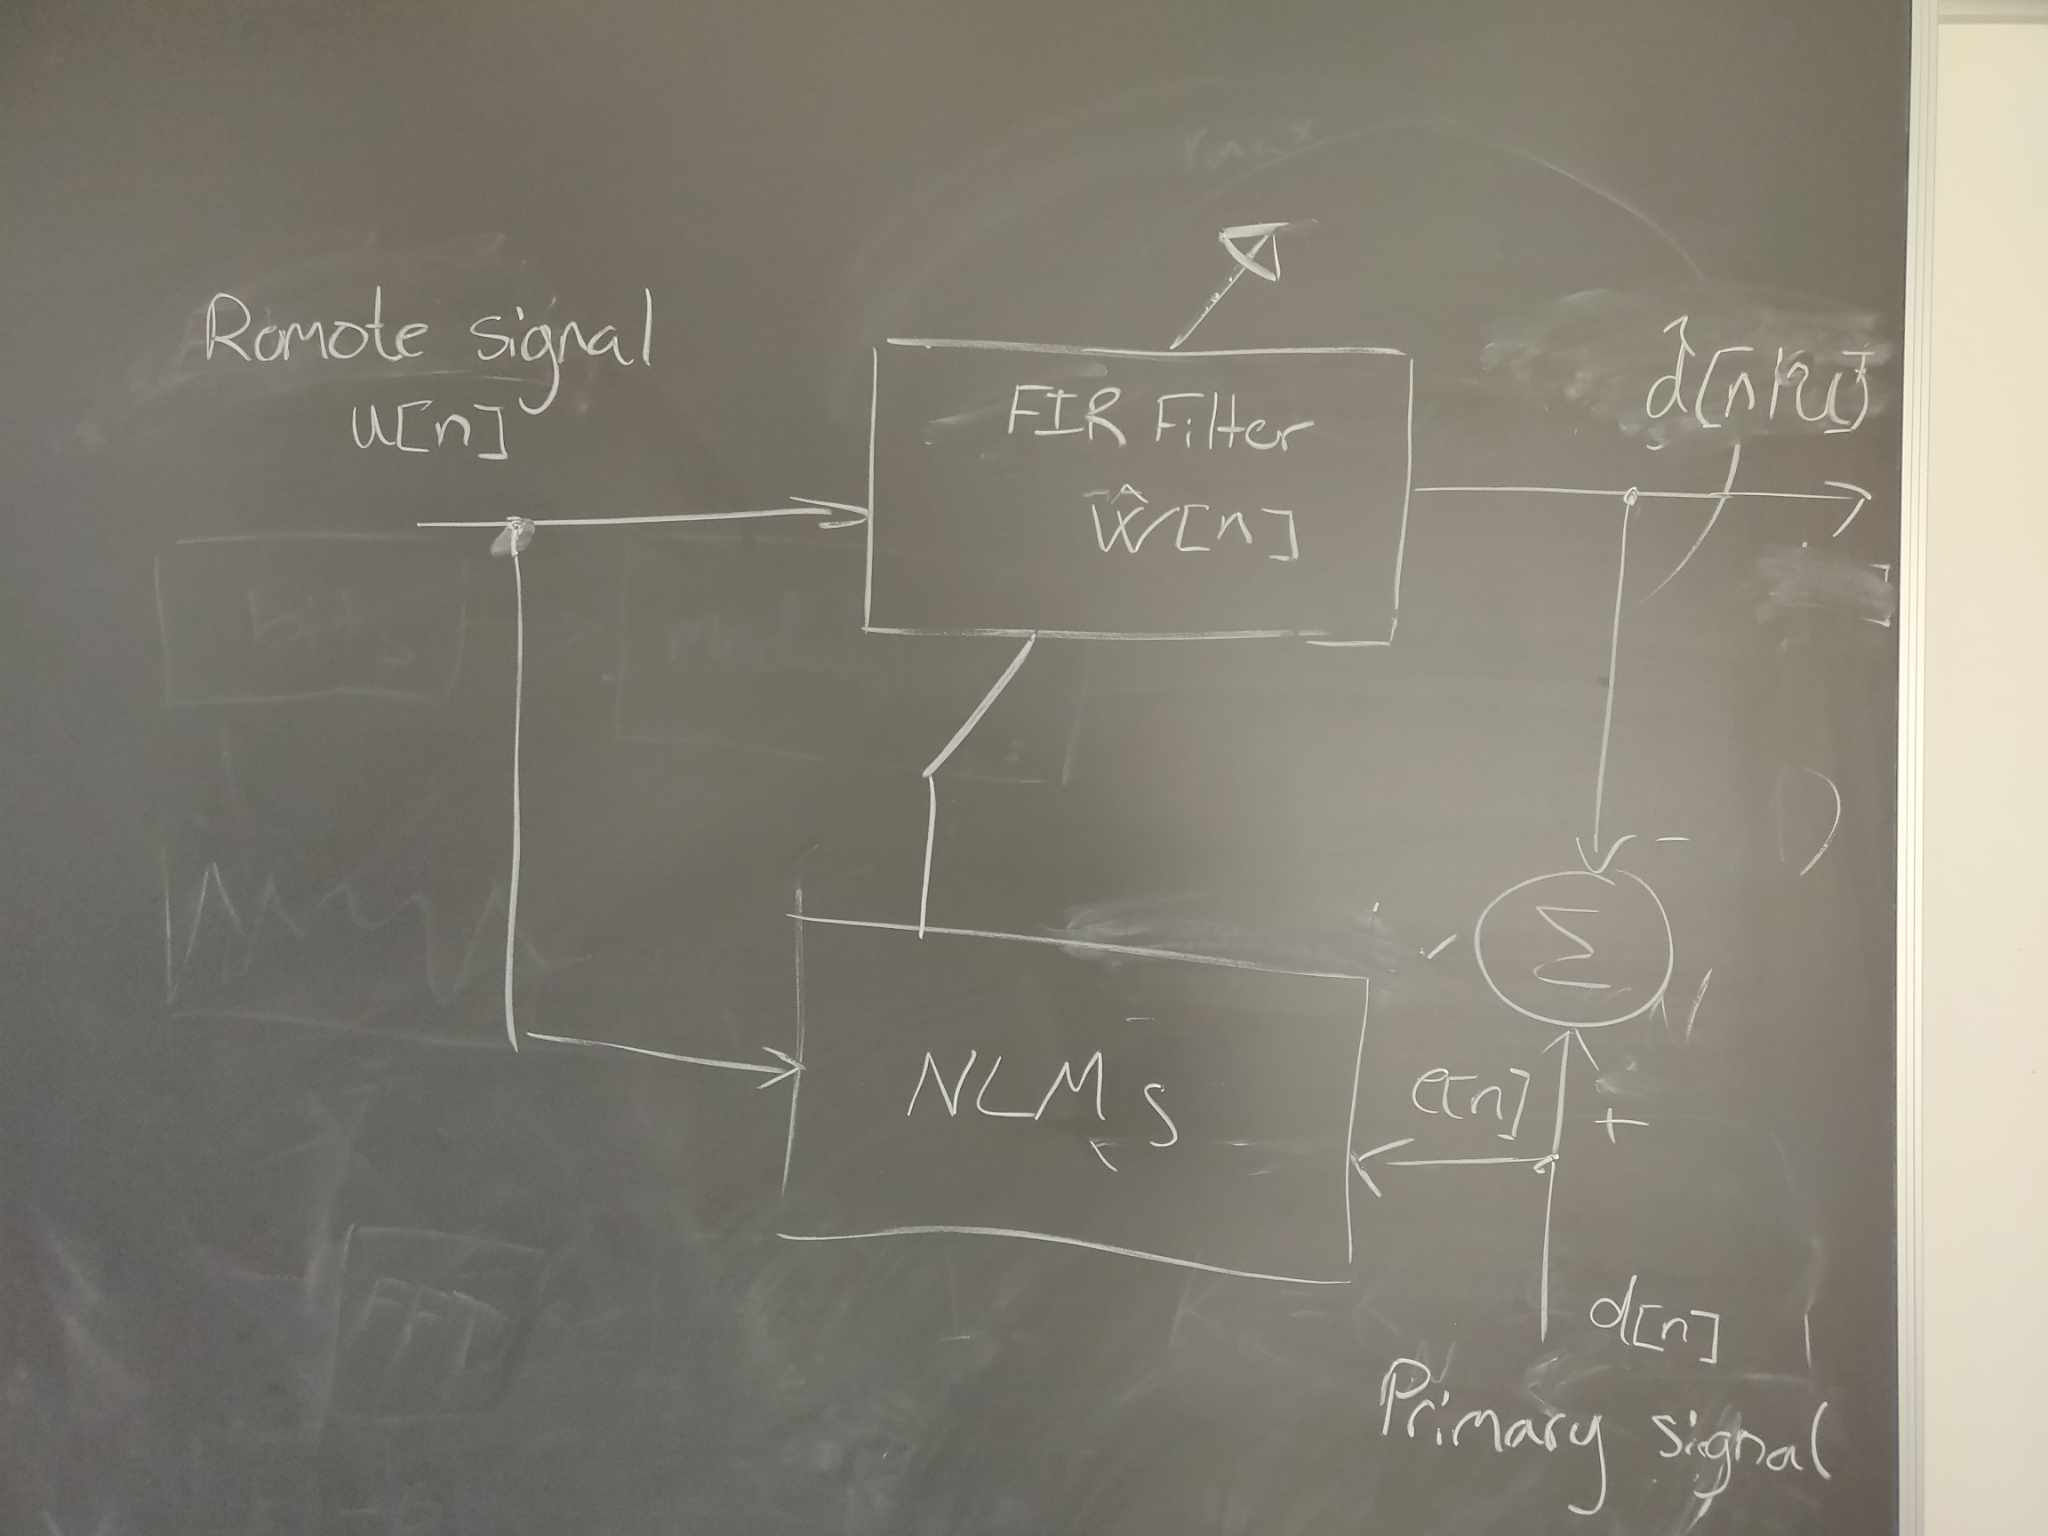

In [1]:
import numpy as np

In [2]:
# Load the data
primary = np.loadtxt('data/signal.asc')
local = np.loadtxt('data/local.asc')
remote = np.loadtxt('data/remota.asc')

### Compute a priori SNR
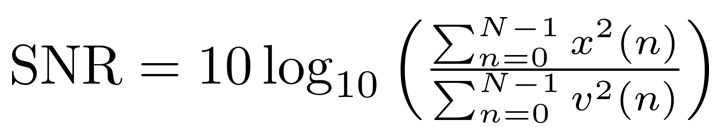
where

x(n) is the target signal

v(n) is the noise signal

In [3]:
def SNR(signal, noise):
    return 10*np.log10(np.sum(signal**2)/np.sum(noise**2))

SNR_primary = SNR(local, primary-local)
print(f"SNR of the primary signal: {SNR_primary:.2f} dB")

SNR of the primary signal: 7.74 dB


### Implement NLMS
- Search for step-size mu [0.0001... 0.0512] in steps of 0.0001
- Search for filter order M [1... 10] in steps of 1

Find the mu and M that optimize the SNR


In [5]:
mu = np.round(np.arange(0.0001, 0.0512+0.0001, 0.0001),4) # + step size to include endpoint
M = np.arange(1, 10+1, 1)

def NMLS(mu, M):
    w = np.zeros(M)
    for n in range(M, len(local)):
        u = remote[n-M:n]
        d = primary[n]
        e = d - w.T * u # note that for non real we use the hermitian transpose here instead of normal transpose
        w = w + mu/np.linalg.norm(u)**2 * u * e # linalg is 2 norm by default
        
    return w

remote_est = np.zeros(len(remote))
for m in M:
    for mu_val in mu:
        w = NMLS(mu_val, m)
        for n in range(m, len(local)):
            u = remote[n-m:n]
            remote_est[n] = w.T * u

        SNR_est = SNR(primary, primary-remote_est)
        print(f"SNR of the estimated signal with mu={mu_val} and M={m}: {SNR_est:.2f} dB")
